In [22]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.datasets as tv_datasets
import torchvision.transforms as tv_transforms
import numpy as np


# ========= hyper parameters =========
num_epochs = 256
batch_size = 32
num_workers = 2

# choose path, dataset, model
run_on_local = 1 # 1 for True, 0 for False
dataset1 = 'CIFAR10' # choose between 'MNIST' or 'CIFAR10'
model_id = -2 # 0/2/4/6/8/10 for MNIST, 1/3/5/7/9/11 for CIFAR10
# 2025-3-8 running: resenet18 and cgg16 on cifar10 v/v4
modelnames = ['C3L2_MNIST', 'C3L2_cifar10', 'C5L3_MNIST', 'C5L3_cifar10', 'ResNet18_MNIST', 'ResNet18_cifar10' ,'ResNet20_MNIST', 'ResNet20_cifar10', 'ResNet50_MNIST', 'ResNet50_cifar10', 'VGG16_MNIST', 'VGG16_cifar10', 'ResNet20_omni', 'C5L4_base_cifar10', 'C5L4_BEST_cifar10', 'C5L4_BEST_cifar10_nodrp']

optimizer_id = 0 # 0 for Adam, 1 for SGD
data_aug = True

# ===================================



# add path for dataset/model script depending on testing on local or running in kaggle:
import sys

# some experimental setup
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device(type='cpu')
kaggle = "/kaggle/input/cifar-10-dlhw1-2/data"
local = "../data"

if run_on_local:
    data_path = local
    sys.path.append('./code')
    
else:
    data_path = kaggle
    sys.path.append('/kaggle/input')

from mymodels import models
print('successfully load all pac')

successfully load all pac


In [23]:

# choose whether or not to use data augmentation strategy
if data_aug:
    # ============ MNIST transform with aug ===========
    if dataset1 == 'MNIST':
        transformation = dict()
        for data_type in ("train", "test"):
            is_train = data_type=="train"
            transformation[data_type] = tv_transforms.Compose(([
            tv_transforms.RandomRotation(15),  
            tv_transforms.RandomHorizontalFlip(),
            tv_transforms.RandomAffine(0, translate=(0.1, 0.1)),  
            # tv_transforms.RandomResizedCrop(28, scale=(0.9, 1.1)), 
            tv_transforms.ToTensor(),  
            tv_transforms.Normalize((0.1307,), (0.3081,))  
        ] if is_train else [
            tv_transforms.ToTensor(),
            tv_transforms.Normalize((0.1307,), (0.3081,))]))

    elif dataset1 == 'CIFAR10':
    # ============== cifar transform with aug ================
        transformation = dict()
        for data_type in ("train", "test"):
            is_train = data_type=="train"
            transformation[data_type] = tv_transforms.Compose((
                [
                    
                    tv_transforms.RandomRotation(degrees=15),
                    tv_transforms.RandomHorizontalFlip(),
                    tv_transforms.RandomAffine(degrees = 0, translate = (0.1, 0.1)),
                    tv_transforms.ColorJitter(
                        brightness=0.2, 
                        contrast=0.2,
                        saturation=0.2,
                        hue=0.1
                    ),
                    

                    tv_transforms.ToTensor(),
                    tv_transforms.Normalize(
                        mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]
                    )
                ] if is_train else [
                    tv_transforms.ToTensor(),
                    tv_transforms.Normalize(
                        mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]
                    )
                ]
            ))

# ============= transformation without data augmentation ==================
else:
    if dataset1 == 'CIFAR10':
        transformation = dict()
        for data_type in ('train', 'test'):
            is_train = data_type == 'train'
            transformation[data_type] = tv_transforms.Compose(([
            tv_transforms.RandomRotation(degrees=15),
            tv_transforms.RandomHorizontalFlip(),
            tv_transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            tv_transforms.ToTensor(),
            tv_transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
        ] if is_train else  [   
            tv_transforms.ToTensor(),
            tv_transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
        ]))
    elif dataset1 == 'MNIST':
        transformation = dict()
        for data_type in ('train', 'test'):
            is_train = data_type == 'train'
            transformation[data_type] = tv_transforms.Compose(([
            tv_transforms.ToTensor(),  
            tv_transforms.Normalize((0.1307,), (0.3081,))  
        ] if is_train else  [   
            tv_transforms.ToTensor(),  
            tv_transforms.Normalize((0.1307,), (0.3081,))  
        ]))

# ======= prepare datasets ========
dataloader = getattr(tv_datasets, dataset1)
dataset, loader = {}, {}
for data_type in ("train", "test"):
    is_train = data_type=="train"
    # root=./data: create data file in root path if there is none, dataset size ~340MB
    # path kaggle: "/kaggle/input/cifar-10-dlhw1/data"
    # path local: "../data"
    dataset[data_type] = dataloader(
        root=data_path, train=is_train, download=True, transform=transformation[data_type],
    )
    loader[data_type] = torch.utils.data.DataLoader(
        dataset[data_type], batch_size=batch_size, shuffle=is_train, num_workers=num_workers
    )


In [13]:
# dataset['train'].data[:2]

f = tv_transforms.Compose(
                    [tv_transforms.RandomRotation(degrees=15),
                        tv_transforms.RandomHorizontalFlip(),
                        tv_transforms.RandomAffine(degrees = 0, translate = (0.1, 0.1)),
                        tv_transforms.ColorJitter(
                            brightness=0.2, 
                            contrast=0.2,
                            saturation=0.2,
                            hue=0.1
                        ),
                        tv_transforms.ToTensor()])

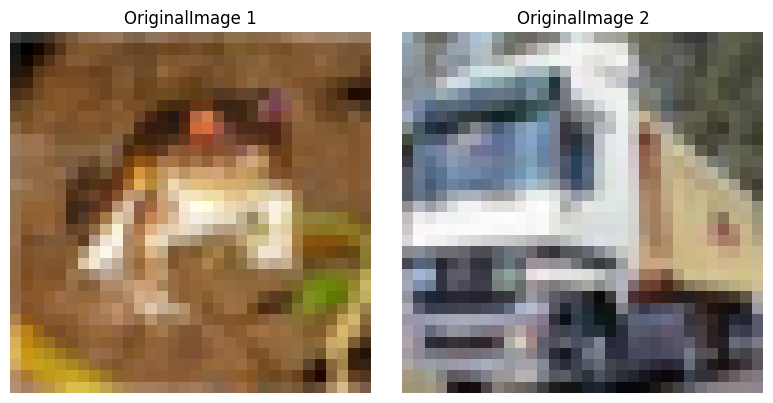

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 data 是形状为 (2, 32, 32, 3) 的numpy数组
# 这里生成一个示例数据（实际使用时替换为真实数据）
data = dataset['train'].data[:2]

# 创建子图
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# 可视化每张图片
for i in range(2):
    # 调整子图间距
    axes[i].imshow(data[i], cmap = 'gray')
    axes[i].axis('off')  # 关闭坐标轴
    axes[i].set_title(f'OriginalImage {i+1}')

plt.tight_layout()
plt.savefig('../texfile/fig/original.png')
plt.show()

In [5]:
data.shape

torch.Size([2, 28, 28])

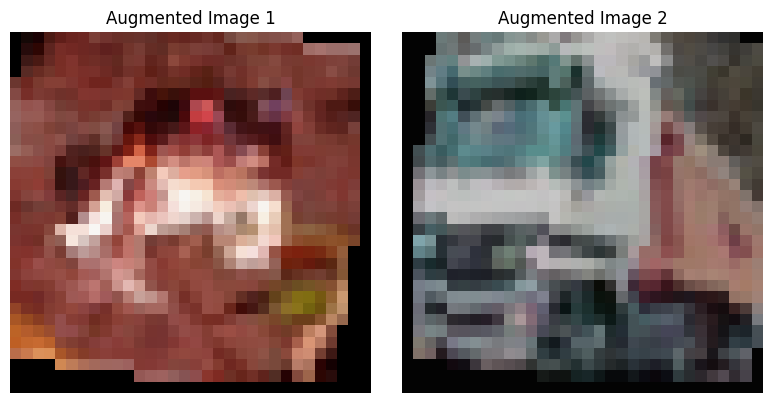

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as tv_transforms

def apply_transforms(data):
    """应用数据增强变换，特别注意输入数据类型处理"""
    # 必须包含ToPILImage转换，因为后续增强操作需要PIL格式输入
    transform = tv_transforms.Compose([
        tv_transforms.ToPILImage(),  # 关键步骤：将numpy数组转为PIL图像
        tv_transforms.RandomRotation(degrees=15),
        tv_transforms.RandomHorizontalFlip(),
        tv_transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
        tv_transforms.ColorJitter(
            brightness=0.2, 
            contrast=0.2,
            saturation=0.2,
            hue=0.1
        ),
        tv_transforms.ToTensor()  # 自动将PIL转换为Tensor并归一化到[0,1]
    ])
    
    # 对每个样本独立应用变换（确保不同的随机增强）
    transformed_imgs = []
    for img in data:
        transformed_img = transform(img)  # 输入应为HWC格式的numpy数组
        transformed_imgs.append(transformed_img)
    
    return torch.stack(transformed_imgs)  # 合并为(2,3,32,32)的tensor

def visualize_tensor_images(tensor_batch):
    """可视化经过变换的tensor图像"""
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    
    for i in range(tensor_batch.shape[0]):
        img_tensor = tensor_batch[i]
        
        # 处理设备与维度顺序
        img = img_tensor.permute(1, 2, 0).cpu().numpy()  # (H, W, C)
        
        # 自动处理0-1范围的浮点数显示
        axes[i].imshow(np.clip(img, 0, 1), cmap = 'gray')  # 防止数值溢出
        axes[i].axis('off')
        axes[i].set_title(f'Augmented Image {i+1}')
    plt.tight_layout()
    plt.savefig('../texfile/fig/augmented.png')
    
    plt.show()

# 生成模拟数据（实际应替换为真实数据）
# original_data = np.random.randint(0, 255, 
#                                 size=(2, 32, 32, 3),
#                                 dtype=np.uint8)

original_data = dataset['train'].data[:2]
# 应用数据增强
transformed_data = apply_transforms(original_data)

# 可视化结果
visualize_tensor_images(transformed_data)